<a href="https://colab.research.google.com/github/mehrnazeraeisi/Pistachio/blob/main/Pistachio_KnnClassification_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# [1] Prioritize features based on single-feature KNN accuracy
def prioritize_features_by_accuracy(X, y, features):
    feature_scores = []
    knn = KNeighborsClassifier()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D shape
        knn.fit(X_feature, y)
        y_pred = knn.predict(X_feature)
        acc = accuracy_score(y, y_pred)
        feature_scores.append((feature, acc))

    df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
    return df_scores.sort_values(by='Accuracy', ascending=False)

In [3]:
# [2] Safe accuracy computation for selected feature groups
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)


In [5]:
# بارگذاری فایل اکسل
data = pd.read_excel('Pistachio.xlsx')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')
    AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0

(2148, 17)

In [7]:
import pandas as pd

# ساخت جدول توضیح ویژگی‌ها
features_description = pd.DataFrame({
    'Feature': [
        'AREA', 'PERIMETER', 'MAJOR_AXIS_LENGTH', 'MINOR_AXIS_LENGTH',
        'ECCENTRICITY', 'EQUIVALENT_DIAMETER', 'SOLIDITY', 'CONVEX_AREA',
        'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS',
        'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4',
        'Class'
    ],
    'Description': [
        'مساحت پسته (تعداد پیکسل‌های داخلی شکل)',
        'محیط پسته (طول مرز خارجی)',
        'طول محور اصلی (طول‌ترین قطر بیضی برازش داده‌شده)',
        'طول محور فرعی (کوتاه‌ترین قطر بیضی برازش داده‌شده)',
        'بیضوی بودن (نسبت فاصله کانون‌ها به طول محور اصلی)',
        'قطر دایره معادل از نظر مساحت',
        'نسبت ناحیه به ناحیه محدب (چگالی)',
        'مساحت ناحیه محدب',
        'نسبت ناحیه به جعبه محدودکننده (Bounding Box)',
        'نسبت طول به عرض',
        'گردی شکل (چقدر به دایره نزدیک است)',
        'فشردگی (Compactness)',
        'ضریب شکل ۱ (Shape Factor 1)',
        'ضریب شکل ۲ (Shape Factor 2)',
        'ضریب شکل ۳ (Shape Factor 3)',
        'ضریب شکل ۴ (Shape Factor 4)',
        'کلاس (نوع پسته: سبز یا قرمز)'
    ]
})

features_description


,Feature,Description
0,AREA,مساحت پسته (تعداد پیکسل‌های داخلی شکل)
1,PERIMETER,محیط پسته (طول مرز خارجی)
2,MAJOR_AXIS_LENGTH,طول محور اصلی (طول‌ترین قطر بیضی برازش داده‌شده)
3,MINOR_AXIS_LENGTH,طول محور فرعی (کوتاه‌ترین قطر بیضی برازش داده‌...
4,ECCENTRICITY,بیضوی بودن (نسبت فاصله کانون‌ها به طول محور اصلی)
5,EQUIVALENT_DIAMETER,قطر دایره معادل از نظر مساحت
6,SOLIDITY,نسبت ناحیه به ناحیه محدب (چگالی)
7,CONVEX_AREA,مساحت ناحیه محدب
8,EXTENT,نسبت ناحیه به جعبه محدودکننده (Bounding Box)
9,ASPECT_RATIO,نسبت طول به عرض


In [10]:
# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Class', axis=1)
y_data = data['Class']
all_features = X_data.columns       # نام ویژگی‌ها

In [11]:
# [4] Prioritize all features by single-feature accuracy
feature_scores = prioritize_features_by_accuracy(X_data, y_data, all_features)
print("🔎 Feature-wise Accuracy Ranking:")
print(feature_scores)


🔎 Feature-wise Accuracy Ranking:
          Feature  Accuracy
3      MINOR_AXIS  0.868715
11    COMPACTNESS  0.844507
14  SHAPEFACTOR_3  0.844507
4    ECCENTRICITY  0.824953
9    ASPECT_RATIO  0.822626
5         EQDIASQ  0.821695
0            AREA  0.820298
7     CONVEX_AREA  0.815642
10      ROUNDNESS  0.750931
15  SHAPEFACTOR_4  0.743948
6        SOLIDITY  0.731378
2      MAJOR_AXIS  0.713687
1       PERIMETER  0.712291
8          EXTENT  0.692272
12  SHAPEFACTOR_1  0.658287
13  SHAPEFACTOR_2  0.574953


In [17]:
# [5] Group features based on accuracy thresholds
strong_features = feature_scores[feature_scores['Accuracy'] > 0.86]['Feature'].tolist()
medium_features_1 = feature_scores[feature_scores['Accuracy'] > 0.84]['Feature'].tolist()
medium_features_2 = feature_scores[feature_scores['Accuracy'] > 0.82]['Feature'].tolist()
medium_features_3 = feature_scores[feature_scores['Accuracy'] > 0.8]['Feature'].tolist()
medium_features_4 = feature_scores[feature_scores['Accuracy'] > 0.75]['Feature'].tolist()
medium_features_5 = feature_scores[feature_scores['Accuracy'] > 0.73]['Feature'].tolist()
medium_features_6 = feature_scores[feature_scores['Accuracy'] > 0.71]['Feature'].tolist()
medium_features_7 = feature_scores[feature_scores['Accuracy'] > 0.6]['Feature'].tolist()


In [18]:
# [6] Evaluate grouped features using multi-feature KNN accuracy
groups = [list(all_features), strong_features, medium_features_1, medium_features_2,
          medium_features_3, medium_features_4, medium_features_5,medium_features_6,medium_features_7 ]

acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

# [7] Create summary table
summary_df = pd.DataFrame({
    'Feature Group': ['All Features', 'Strong Features', 'medium_features_1', 'medium_features_2',
                      'medium_features_3', 'medium_features_4','medium_features_5' ,'medium_features_6', 'medium_features_7'],
    'Accuracy': acc_scores})

print("\n📊 Grouped Feature Performance Summary:")
print(summary_df)


📊 Grouped Feature Performance Summary:
       Feature Group  Accuracy
0       All Features  0.829609
1    Strong Features  0.868715
2  medium_features_1  0.874302
3  medium_features_2  0.838920
4  medium_features_3  0.829143
5  medium_features_4  0.829143
6  medium_features_5  0.829143
7  medium_features_6  0.829609
8  medium_features_7  0.829609


In [19]:
# [8] Final evaluation function: repeats KNN classification and plots accuracy over repeats
def evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1,  all_features, test_size, n_repeats):
    accuracy_scores = {
        "all_features": [],
        "medium_features_1": []
    }

    feature_groups = {
        "all_features": all_features,
        "medium_features_1": medium_features_1,
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            k = int(np.sqrt(len(X_train)))
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train[group_features], y_train)
            y_pred = knn.predict(X_test[group_features])
            acc = accuracy_score(y_test, y_pred)
            accuracy_scores[group_name].append(acc)

    # Plotting accuracy per repeat
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(10, 5))
    for group_name, acc_list in accuracy_scores.items():
        plt.plot(x, acc_list, label=f"{group_name.replace('_', ' ').title()}", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy Over Repeats')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

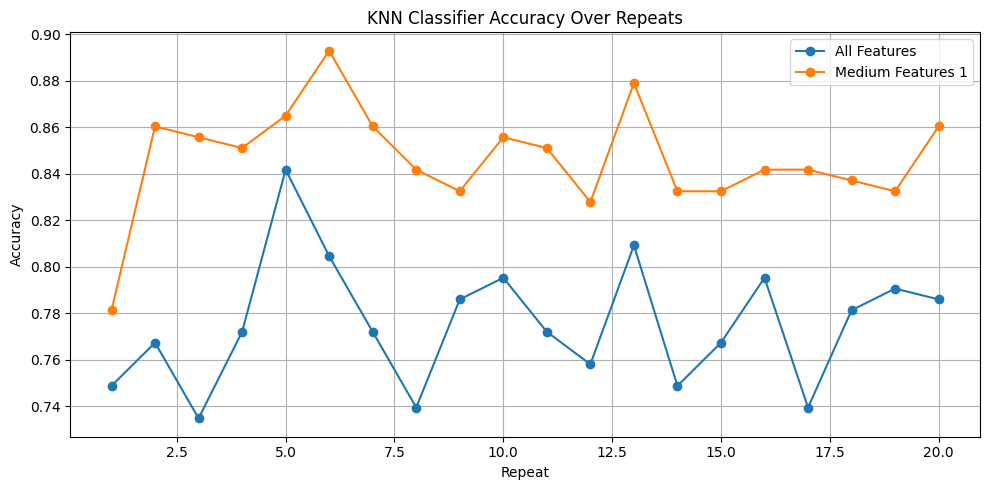

In [20]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1,  all_features, test_size=0.10, n_repeats=20)



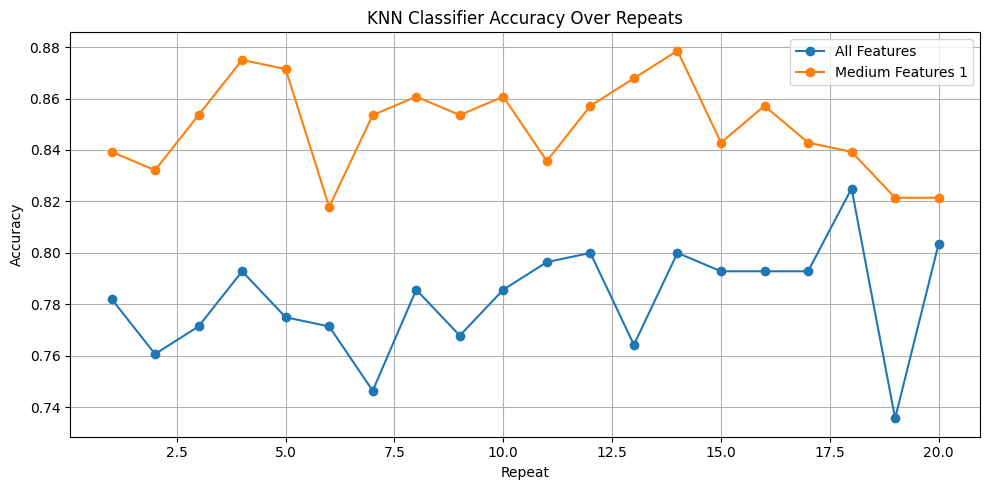

In [21]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1,  all_features, test_size=0.13, n_repeats=20)


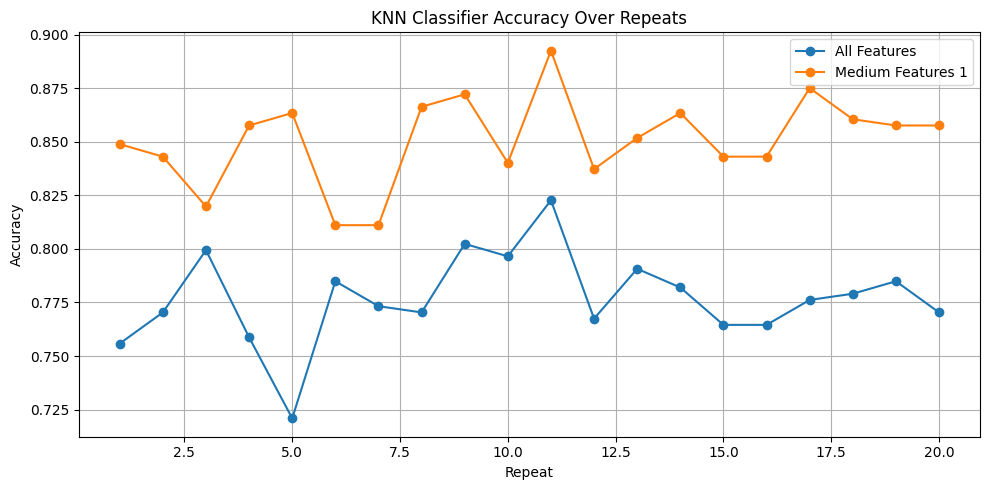

In [22]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1, all_features, test_size=0.16, n_repeats=20)


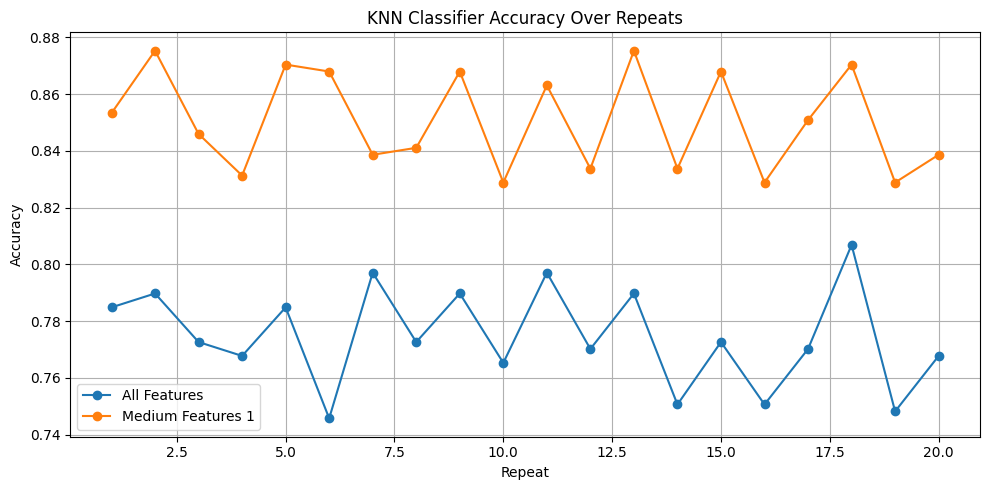

In [23]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1, all_features, test_size=0.19, n_repeats=20)


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')
    AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0

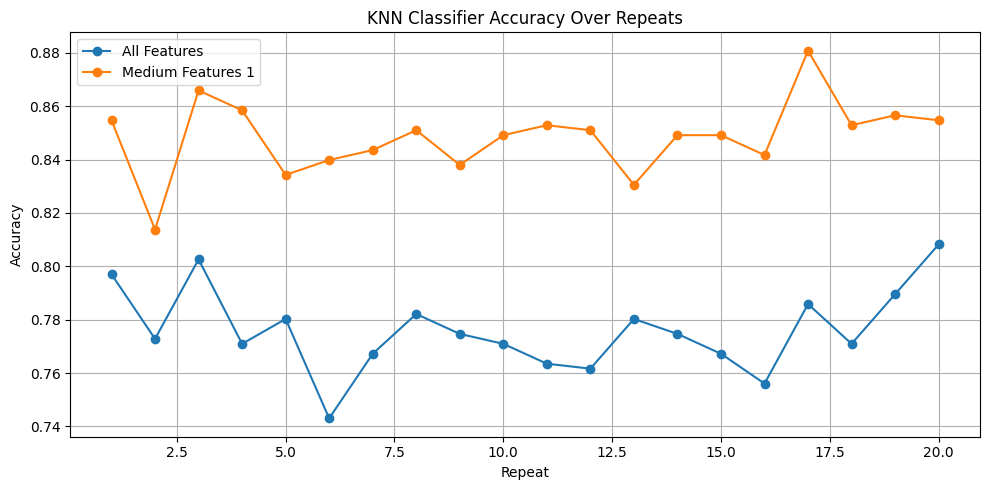

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# [1] Prioritize features based on single-feature KNN accuracy
def prioritize_features_by_accuracy(X, y, features):
    feature_scores = []
    knn = KNeighborsClassifier()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D shape
        knn.fit(X_feature, y)
        y_pred = knn.predict(X_feature)
        acc = accuracy_score(y, y_pred)
        feature_scores.append((feature, acc))

    df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
    return df_scores.sort_values(by='Accuracy', ascending=False)

# [2] Safe accuracy computation for selected feature groups
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

# بارگذاری فایل اکسل
data = pd.read_excel('Pistachio.xlsx')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Class', axis=1)
y_data = data['Class']
all_features = X_data.columns       # نام ویژگی‌ها


# [4] Prioritize all features by single-feature accuracy
feature_scores = prioritize_features_by_accuracy(X_data, y_data, all_features)
print("🔎 Feature-wise Accuracy Ranking:")
print(feature_scores)

# [5] Group features based on accuracy thresholds
strong_features = feature_scores[feature_scores['Accuracy'] > 0.86]['Feature'].tolist()
medium_features_1 = feature_scores[feature_scores['Accuracy'] > 0.84]['Feature'].tolist()
medium_features_2 = feature_scores[feature_scores['Accuracy'] > 0.82]['Feature'].tolist()
medium_features_3 = feature_scores[feature_scores['Accuracy'] > 0.8]['Feature'].tolist()
medium_features_4 = feature_scores[feature_scores['Accuracy'] > 0.75]['Feature'].tolist()
medium_features_5 = feature_scores[feature_scores['Accuracy'] > 0.73]['Feature'].tolist()
medium_features_6 = feature_scores[feature_scores['Accuracy'] > 0.71]['Feature'].tolist()
medium_features_7 = feature_scores[feature_scores['Accuracy'] > 0.6]['Feature'].tolist()


# [6] Evaluate grouped features using multi-feature KNN accuracy
groups = [list(all_features), strong_features, medium_features_1, medium_features_2,
          medium_features_3, medium_features_4, medium_features_5,medium_features_6,medium_features_7 ]

acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

# [7] Create summary table
summary_df = pd.DataFrame({
    'Feature Group': ['All Features', 'Strong Features', 'medium_features_1', 'medium_features_2',
                      'medium_features_3', 'medium_features_4','medium_features_5' ,'medium_features_6', 'medium_features_7'],
    'Accuracy': acc_scores})
print("\n📊 Grouped Feature Performance Summary:")
print(summary_df)

# [8] Final evaluation function: repeats KNN classification and plots accuracy over repeats
def evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1,  all_features, test_size, n_repeats):
    accuracy_scores = {
        "all_features": [],
        "medium_features_1": []

    }

    feature_groups = {
        "all_features": all_features,
        "medium_features_1": medium_features_1
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            k = int(np.sqrt(len(X_train)))
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train[group_features], y_train)
            y_pred = knn.predict(X_test[group_features])
            acc = accuracy_score(y_test, y_pred)
            accuracy_scores[group_name].append(acc)

    # Plotting accuracy per repeat
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(10, 5))
    for group_name, acc_list in accuracy_scores.items():
        plt.plot(x, acc_list, label=f"{group_name.replace('_', ' ').title()}", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy Over Repeats')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1, all_features, test_size=0.25, n_repeats=20)


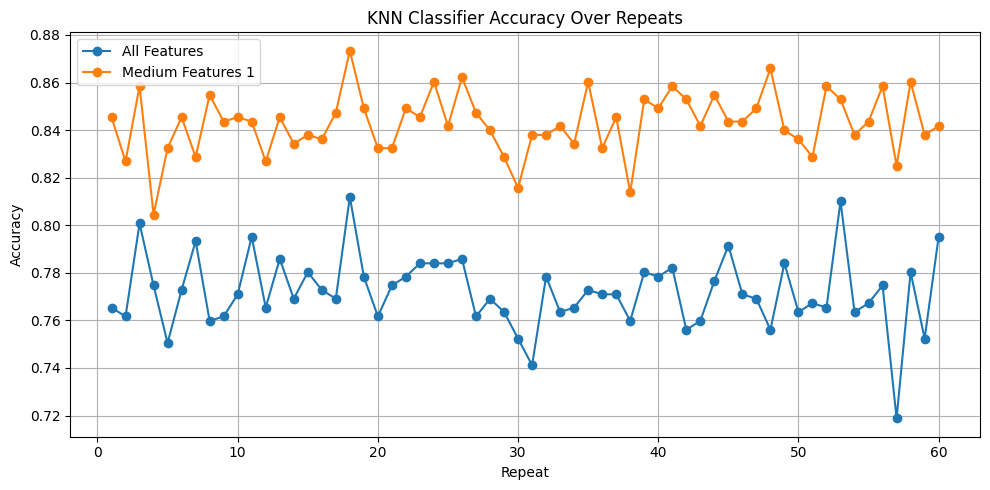

In [25]:
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_1, all_features, test_size=0.25, n_repeats=60)
